# Outlier Detection
Outliers are extreme values that can skew our dataset, sometimes giving us an incorrect picture of how things actually are in our dataset. The hardest part of this is determining which data points are acceptable, and which ones constitute "outlier" status.

# Activity: Find and remove outliers if our dataset is Normal
When our sample data is close to normal distribution, the samples that be outside of three standard deviation can be considered as outliers.

Task: Write a function that first find outliers for a normally distributed data, then remove them.

In [1]:
import numpy as np

def find_remove_outlier(data_sample):
    # calculate summary statistics
    data_mean, data_std = np.mean(data), np.std(data)
    # define cut-off
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers, outliers_removed

# Interquartile range (IQR) for finding and removing outlier when data has any distribution (10 min)
Tukey suggested to calculate the range between the first quartile (25%) and third quartile (75%) in the data, called the interquartile range (IQR).

# Activity: IQR outlier detection and removal
Task: write a function to find and remove outliers based on IQR method for this data sample: Hint: $Q_1$ is the first quartile (25%) $Q_3$ is the third quartile (75%)

In [6]:
import numpy as np
from scipy import stats

def find_remove_outlier_iqr(data_sample):
    # calculate interquartile range
    q25, q75 = np.percentile(data_sample, 25), np.percentile(data_sample, 75)
    iqr = q75 - q25
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    # identify outliers
    outliers = [x for x in data_sample if x < lower or x > upper]
    # remove outliers
    outliers_removed = [x for x in data_sample if x > lower and x < upper]
    return outliers

y = np.array([-5, 11, 14])
x =  np.concatenate((stats.norm.rvs(loc=5 , scale=1 , size=100), y))
print(type(x))
print(find_remove_outlier_iqr(x))
print(scipy.stats.iqr(x))
#space
#space
#space

<class 'numpy.ndarray'>
[7.8511786048585686, -5.0, 11.0, 14.0]
1.2966243128381958


# How we can visually see the outlier?¶
Box plot use the IQR method to display data and outliers


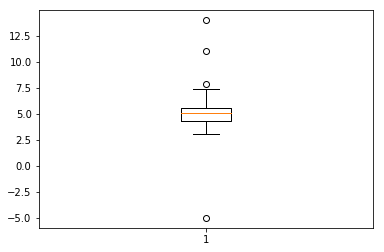

In [9]:
import matplotlib.pyplot as plt

plt.boxplot(x)

plt.show()

## Statistical Analysis

We have learned null hypothesis, and compared two-sample test to check whether two samples are the same or not

To add more to statistical analysis, the follwoing topics should be covered:

1- Approxite the histogram of data with combination of Gaussian (Normal) distribution functions:

    Gaussian Mixture Model (GMM)
    Kernel Density Estimation (KDE)
    
2- Correlation among features

## Review

Write a function that computes and plot histogram of a given data

Histogram is one method for estimating density

## What is Gaussian Mixture Model (GMM)?

GMM is a probabilistic model for representing normally distributed subpopulations within an overall population

<img src="Images/gmm_fig.png" width="300">

$p(x) = \sum_{i = 1}^{K} w_i \ \mathcal{N}(x \ | \ \mu_i,\ \sigma_i)$

$\sum_{i=1}^{K} w_i = 1$

https://brilliant.org/wiki/gaussian-mixture-model/

The picture won't load because I don't actually have it, but it's basically three skinny Normals next to one another, and the GMM is .. like.. a curve over them?


## Activity : Fit a GMM to a given data sample 

Task: 

1- Generate the concatination of the random variables as follows:

`x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))`

2- Plot the histogram of `x`

3- Obtain the weights, mean and variances of each Gassuian

Steps needed: 
`from sklearn import mixture 
gmm = mixture.GaussianMixture(n_components=2)
gmm.fit(x.reshape(-1,1))`

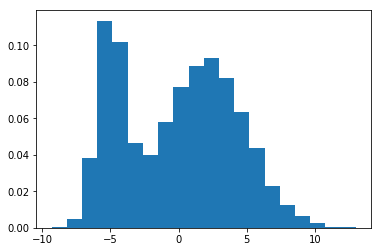

means: [[-4.93408789]
 [ 2.10065774]]
covariances: [[[1.07740923]]

 [[8.4298417 ]]]
weights: [0.31280586 0.68719414]


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import mixture

# Generate data samples and plot its histogram
x_1 = np.random.normal(-5, 1, 3000)
x_2 = np.random.normal(2, 3, 7000) 
x = np.concatenate((x_1, x_2))
plt.hist(x, bins=20, density=1)
plt.show()

# Define a GMM model and obtain its parameters
gmm = mixture.GaussianMixture(n_components=2) # define our GMM model
gmm.fit(x.reshape(-1,1)) # fit needs our samples as input arguments
print("means: " + str(gmm.means_))
print("covariances: " + str(gmm.covariances_))
print("weights: " + str(gmm.weights_))

## The GMM has learn the probability density function of our data sample

Lets the model generate sample from it model:



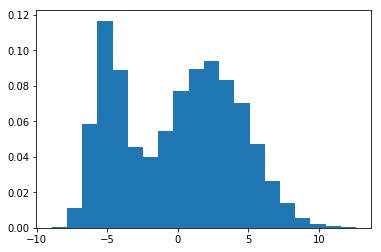

In [13]:
z = gmm.sample(10000)
plt.hist(z[0], bins=20, density=1)
plt.show()

## Kernel Density Estimation (KDE)

Kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable. In other words the aim of KDE is to find probability density function (PDF) for a given dataset.

Approximate the pdf of dataset:

$p(x) = \frac{1}{Nh}\sum_{i = 1}^{N} \ K(\frac{x - x_i}{h})$

where $h$ is a bandwidth and $N$ is the number of data points

## Activity: Apply KDE on a given data sample

Task: Apply KDE on previous generated sample data `x`

Hint: use 

`kde = KernelDensity(kernel='gaussian', bandwidth=0.6)`

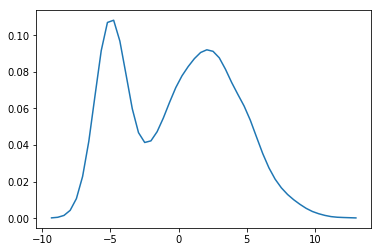

In [14]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=0.6)
kde.fit(x.reshape(-1,1))

s = np.linspace(np.min(x), np.max(x))
log_pdf = kde.score_samples(s.reshape(-1,1))
plt.plot(s, np.exp(log_pdf))

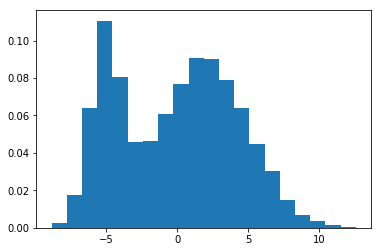

In [15]:
m = kde.sample(10000)
plt.hist(m, bins=20, density=1)
plt.show()

## KDE can learn handwitten digits distribution and generate new digits
#### This is just neat - it is not going to be on the final exam

http://scikit-learn.org/stable/auto_examples/neighbors/plot_digits_kde_sampling.html

## Correlation 

Correlation is used to test relationships between quantitative variables

Some examples of data that have a high correlation:

1- Your caloric intake and your weight

2- The amount of time your study and your GPA

Question what is negative correlation?

Correlations are useful because we can find out what relationship variables have, we can make predictions about future behavior. 

## Activity: Obtain the correlation among all features of iris dataset

1- Review the iris dataset. What are the features? 

2- Eliminate two columns `['Id', 'Species']`

3- Compute the correlation among all features. 

Hint: Use `df.corr()`

4- Plot the correlation by heatmap and corr plot in Seaborn -> `sns.heatmap`, `sns.corrplot`

5- Write a function that computes the correlation (Pearson formula)

Hint: https://en.wikipedia.org/wiki/Pearson_correlation_coefficient

6- Compare your answer with `scipy.stats.pearsonr` for any given two features


0.8717541573048714
(0.8717541573048712, 1.0384540627941809e-47)


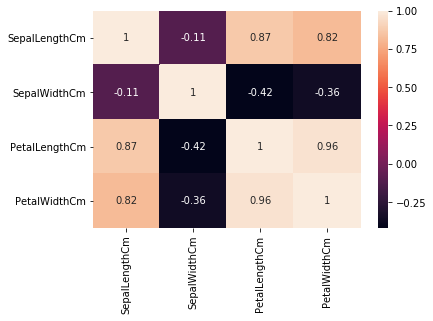

In [17]:
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
import scipy.stats

df = pd.read_csv('Iris.csv')
df = df.drop(columns=['Id', 'Species'])
sns.heatmap(df.corr(), annot=True)

def pearson_corr(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    num = [(i - x_mean)*(j - y_mean) for i,j in zip(x,y)]
    den_1 = [(i - x_mean)**2 for i in x]
    den_2 = [(j - y_mean)**2 for j in y]
    correlation_x_y = np.sum(num)/np.sqrt(np.sum(den_1))/np.sqrt(np.sum(den_2))
    return correlation_x_y

print(pearson_corr(df['SepalLengthCm'], df['PetalLengthCm']))
print(scipy.stats.pearsonr(df['SepalLengthCm'], df['PetalLengthCm']))